In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import time 
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

In [7]:

# os.getcwd() # 현재작업 폴더 반환
# os.chdir(path)  # 작업폴더 변경. path를 설정할 때 유용.

In [8]:
path = os.getcwd()
os.chdir(path)

In [9]:
# 데이터 불러오기
df = pd.read_csv('netflix.csv')

original_df = df.copy()

df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['genres'] = df['genre'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors_s'] = df['actors'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
# 일단 시놉시스는 빼보자 

df.head()

,serial,title_kor,opening_date,just_rating,imdb_rating,runtime,synopsis,director,actors,genre,posterLink,netflix,disney,wavve,watcha,directors,genres,actors_s
0,259066109,황무지의 괴물,2022,54%,4.6,1시간31분,19세기 외딴 황무지에 세상과 단절된 채 살아가는 가족이 있다. 이 집의 어린 아들...,NaN,"InmaCuesta,AsierFlores,RobertoÁlamo,AlejandraH...","공포,스릴러,드라마",https://images.justwatch.com/poster/259066109/...,1,0,0,0,[],"[공포, 스릴러, 드라마]","[InmaCuesta, AsierFlores, RobertoÁlamo, Alejan..."
1,261668749,홈 팀,2022,74%,6,1시간35분,자격 정지 처분을 받은 NFL 감독 숀 페이턴. 아들이 선수로 뛰는 형편없는 유소년...,"CharlesKinnane,DanielKinnane","KevinJames,TaylorLautner,RobSchneider,JackieSa...","코미디,스포츠",https://images.justwatch.com/poster/261668749/...,1,0,0,0,"[CharlesKinnane, DanielKinnane]","[코미디, 스포츠]","[KevinJames, TaylorLautner, RobSchneider, Jack..."
2,259326899,해적: 도깨비 깃발,2022,74%,6.1,2시간6분,자칭 고려 제일검인 의적단 두목 무치와 바다를 평정한 해적선의 주인 해랑. 한 배에...,KimJoung-hoon,"KangHa-neul,HanHyo-joo,LeeKwang-soo,KwonSang-w...","코미디,액션",https://images.justwatch.com/poster/259326899/...,1,0,0,0,[KimJoung-hoon],"[코미디, 액션]","[KangHa-neul, HanHyo-joo, LeeKwang-soo, KwonSa..."
3,263193885,하트 샷,2022,64%,64%,18min,십 대 소녀 니키와 샘은 서로 사랑하는 사이. 둘은 함께 미래를 꿈꾼다. 니키의 위...,NaN,"ElenaHeuzé,NiaSondaya,BethanyCurry,HilaryWard,...","로맨스,범죄",https://images.justwatch.com/poster/263193885/...,1,0,0,0,[],"[로맨스, 범죄]","[ElenaHeuzé, NiaSondaya, BethanyCurry, HilaryW..."
4,260124702,톨 걸 2,2022,63%,4.7,1시간37분,학교 뮤지컬에서 주인공을 맡게 된다니. 조디의 꿈이 드디어 현실이 되는 걸까. 하지...,EmilyTing,"AvaMichelle,GriffinGluck,SabrinaCarpenter,Clar...","드라마,코미디,가족,로맨스",https://images.justwatch.com/poster/260124702/...,1,0,0,0,[EmilyTing],"[드라마, 코미디, 가족, 로맨스]","[AvaMichelle, GriffinGluck, SabrinaCarpenter, ..."


# tf idf 옵션 공부해야

In [10]:
start_time = time.time()
text_content = df['synopsis']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

In [11]:
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

    
request_transform = vector.transform(df['synopsis'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform) 
df['cluster'].value_counts().head()

34    3014
4        4
24       3
38       3
36       3
Name: cluster, dtype: int64

In [12]:
df['cluster'].value_counts()

34     3014
4         4
24        3
38        3
36        3
       ... 
154       1
156       1
158       1
160       1
199       1
Name: cluster, Length: 195, dtype: int64

In [13]:
df

,serial,title_kor,opening_date,just_rating,imdb_rating,runtime,synopsis,director,actors,genre,posterLink,netflix,disney,wavve,watcha,directors,genres,actors_s,cluster
0,259066109,황무지의 괴물,2022,54%,4.6,1시간31분,19세기 외딴 황무지에 세상과 단절된 채 살아가는 가족이 있다. 이 집의 어린 아들...,NaN,"InmaCuesta,AsierFlores,RobertoÁlamo,AlejandraH...","공포,스릴러,드라마",https://images.justwatch.com/poster/259066109/...,1,0,0,0,[],"[공포, 스릴러, 드라마]","[InmaCuesta, AsierFlores, RobertoÁlamo, Alejan...",34
1,261668749,홈 팀,2022,74%,6,1시간35분,자격 정지 처분을 받은 NFL 감독 숀 페이턴. 아들이 선수로 뛰는 형편없는 유소년...,"CharlesKinnane,DanielKinnane","KevinJames,TaylorLautner,RobSchneider,JackieSa...","코미디,스포츠",https://images.justwatch.com/poster/261668749/...,1,0,0,0,"[CharlesKinnane, DanielKinnane]","[코미디, 스포츠]","[KevinJames, TaylorLautner, RobSchneider, Jack...",34
2,259326899,해적: 도깨비 깃발,2022,74%,6.1,2시간6분,자칭 고려 제일검인 의적단 두목 무치와 바다를 평정한 해적선의 주인 해랑. 한 배에...,KimJoung-hoon,"KangHa-neul,HanHyo-joo,LeeKwang-soo,KwonSang-w...","코미디,액션",https://images.justwatch.com/poster/259326899/...,1,0,0,0,[KimJoung-hoon],"[코미디, 액션]","[KangHa-neul, HanHyo-joo, LeeKwang-soo, KwonSa...",34
3,263193885,하트 샷,2022,64%,64%,18min,십 대 소녀 니키와 샘은 서로 사랑하는 사이. 둘은 함께 미래를 꿈꾼다. 니키의 위...,NaN,"ElenaHeuzé,NiaSondaya,BethanyCurry,HilaryWard,...","로맨스,범죄",https://images.justwatch.com/poster/263193885/...,1,0,0,0,[],"[로맨스, 범죄]","[ElenaHeuzé, NiaSondaya, BethanyCurry, HilaryW...",34
4,260124702,톨 걸 2,2022,63%,4.7,1시간37분,학교 뮤지컬에서 주인공을 맡게 된다니. 조디의 꿈이 드디어 현실이 되는 걸까. 하지...,EmilyTing,"AvaMichelle,GriffinGluck,SabrinaCarpenter,Clar...","드라마,코미디,가족,로맨스",https://images.justwatch.com/poster/260124702/...,1,0,0,0,[EmilyTing],"[드라마, 코미디, 가족, 로맨스]","[AvaMichelle, GriffinGluck, SabrinaCarpenter, ...",34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,209740055,졸업,1967,85%,8,1시간46분,이스턴 대학을 우수한 성적으로 졸업하고 귀가한 벤저민은 주변 사람들로부터 기대를 한...,MikeNichols,"DustinHoffman,AnneBancroft,KatharineRoss,Murra...","코미디,드라마,로맨스",https://images.justwatch.com/poster/209740055/...,1,0,0,0,[MikeNichols],"[코미디, 드라마, 로맨스]","[DustinHoffman, AnneBancroft, KatharineRoss, M...",34
3266,144063459,쉘부르의 우산,1964,82%,7.8,1시간32분,"프랑스 노르망디 해협의 작은 항구도시 쉘부르, 어머니의 우산가게 일을 돕는 ‘쥬느비...",JacquesDemy,"CatherineDeneuve,NinoCastelnuovo,AnneVernon,Mi...","로맨스,드라마,MadeinEurope",https://images.justwatch.com/poster/144063459/...,1,0,0,0,[JacquesDemy],"[로맨스, 드라마, MadeinEurope]","[CatherineDeneuve, NinoCastelnuovo, AnneVernon...",34
3267,245581406,마이 페어 레이디,1964,84%,7.8,2시간40분,런던의 한 극장 앞에서 남루한 복장과 품위 없는 말투로 꽃을 팔고 있는 일라이자(오...,GeorgeCukor,"AudreyHepburn,RexHarrison,StanleyHolloway,Wilf...","로맨스,드라마,가족",https://images.justwatch.com/poster/245581406/...,1,0,0,0,[GeorgeCukor],"[로맨스, 드라마, 가족]","[AudreyHepburn, RexHarrison, StanleyHolloway, ...",34
3268,9070140,아르고 황금 대탐험,1963,79%,7.3,1시간44분,펠리아스는 아리스토왕을 죽이고 테살리아를 정복하겠지만 아리 스토왕의 자식에 의해 왕...,DonChaffey,"ToddArmstrong,NancyKovack,GaryRaymond,Laurence...","판타지,가족,액션",https://images.justwatch.com/poster/9070140/s592,1,0,0,0,[DonChaffey],"[판타지, 가족, 액션]","[ToddArmstrong, NancyKovack, GaryRaymond, Laur...",34


In [14]:
df.columns

Index(['serial', 'title_kor', 'opening_date', 'just_rating', 'imdb_rating',
       'runtime', 'synopsis', 'director', 'actors', 'genre', 'posterLink',
       'netflix', 'disney', 'wavve', 'watcha', 'directors', 'genres',
       'actors_s', 'cluster'],
      dtype='object')

In [15]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title_kor'],key=rowi['serial'],label="MOVIE",mtype=rowi['genre'],rating=rowi['imdb_rating'])
#    G.add_node(rowi['cluster'],label="CLUSTER")
#    G.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors_s']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title_kor'], element, label="ACTED_IN")
    for element in rowi['genres']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title_kor'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title_kor'], element, label="DIRECTED")
    # for element in rowi['countries']:
    #     G.add_node(element,label="COU")
    #     G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title_kor'][:20].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title_kor'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title_kor'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time)) 

 iter 0 -- 0.003992557525634766 seconds --
 iter 1000 -- 4.001633882522583 seconds --
 iter 2000 -- 8.0068941116333 seconds --
 iter 3000 -- 12.396495580673218 seconds --
 finish -- 13.680375099182129 seconds --


In [16]:
import matplotlib.font_manager as fm

from matplotlib import rc

font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

# plt.rc('font', family='NanumBarunGothicOTF')
# plt.title('쪼랩 프렌즈')

In [17]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        # elif G.nodes[e]['label']=="COU":
        #     colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_family=font_name,font_weight='bold', node_color=colors)
    plt.show()

    # nx.draw_networkx_labels(Gs[i],pos,Gs_label[i],font_family=font_name,font_size=10)
    
# list_in=["Ocean's Twelve","Ocean's Thirteen"]
# sub_graph = get_all_adj_nodes(list_in)
# draw_sub_graph(sub_graph)

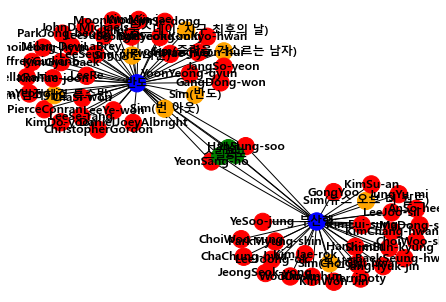

In [18]:
list_in=["반도","부산행"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

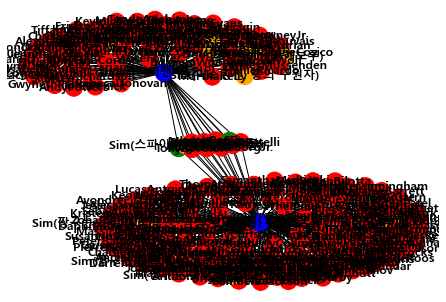

In [19]:
list_in=["스파이더맨: 홈커밍","스파이더맨: 파 프롬 홈"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

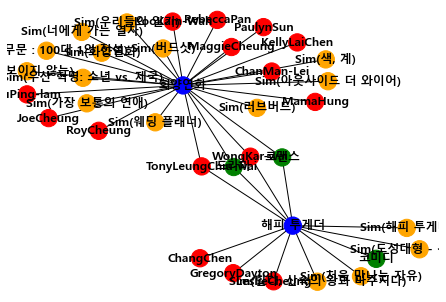

In [20]:
list_in=["해피 투게더","화양연화"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [21]:
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [31]:
result = get_recommendation("스파이더맨: 파 프롬 홈")
print("*"*40+"\n Recommendation for '스파이더맨: 파 프롬 홈'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for '스파이더맨: 파 프롬 홈'
****************************************
스파이더맨: 홈커밍    11.334311
에놀라 홈즈         3.947848
머더 미스터리        3.014311
제이슨 본          2.594032
어쌔신: 더 비기닝     2.505153
dtype: float64


In [23]:
result = get_recommendation("화양연화")
print("*"*40+"\n Recommendation for '화양연화'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for '화양연화'
****************************************
2046             3.135598
아비정전             2.603142
색, 계             2.354005
무간도 2: 혼돈의 시대    2.299155
동사서독 리덕스         1.692903
dtype: float64


In [24]:
result = get_recommendation("부산행")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
82년생 김지영    3.133205
서울역         3.097485
염력          2.933295
궁합          2.619162
극적인 하룻밤     2.378688
dtype: float64


In [25]:
result = get_recommendation("반도")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
염력      2.971796
승리호     2.874372
번 아웃    2.534287
뮤트      2.382068
기생충     1.865770
dtype: float64


In [26]:
result = get_recommendation("쇼생크 탈출")
print("*"*40+"\n Recommendation for '쇼생크 탈출'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for '쇼생크 탈출'
****************************************
그린 마일      6.650312
세븐         2.140891
트루먼 쇼      2.091706
킬링 소프틀리    1.970099
디파티드       1.738462
dtype: float64


In [27]:
result = get_recommendation("포레스트 검프")
print("*"*40+"\n Recommendation for '포레스트 검프'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for '포레스트 검프'
****************************************
스테이트 오브 플레이    2.091706
원더 우먼          1.956593
스탠바이, 웬디       1.717746
블라인드 사이드       1.577808
위자: 저주의 시작     1.577808
dtype: float64


In [28]:
result = get_recommendation("스파이더맨: 홈커밍")
print("*"*40+"\n Recommendation for '포레스트 검프'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for '포레스트 검프'
****************************************
스파이더맨: 파 프롬 홈     11.334311
쥬만지 : 새로운 세계       3.037609
결혼 이야기             2.885390
The Dark Tower     2.682177
에일리언 워페어           2.561685
dtype: float64


In [29]:
result = get_recommendation("원스 어폰 어 타임 인… 할리우드")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
장고: 분노의 추적자       7.198745
헤이트풀8             7.128746
바스터즈: 거친 녀석들      2.801737
시카리오:  암살자의 도시    2.161727
BB프로젝트            1.867372
dtype: float64


In [30]:
result = get_recommendation("Ocean's Twelve")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())

NetworkXError: The node Ocean's Twelve is not in the graph.